# Introduction

Hey, thanks for viewing my Kernel!

If you like my work, please, leave an upvote: it will be really appreciated and it will motivate me in offering more content to the Kaggle community ! :)

In [1]:
import numpy as np
import pandas as pd
import warnings

warnings.simplefilter("ignore")
train = pd.read_csv("/data/elastic-notebook/data/tabular-playground-series-may-2022/train.csv")
test = pd.read_csv("/data/elastic-notebook/data/tabular-playground-series-may-2022/test.csv")
sub = pd.read_csv("/data/elastic-notebook/data/tabular-playground-series-may-2022/sample_submission.csv")
display(train.head())
display(test.head())
display(sub.head())

id      f_00      f_01      f_02      f_03      f_04      f_05      f_06  \
0   0 -1.373246  0.238887 -0.243376  0.567405 -0.647715  0.839326  0.113133   
1   1  1.697021 -1.710322 -2.230332 -0.545661  1.113173 -1.552175  0.447825   
2   2  1.681726  0.616746 -1.027689  0.810492 -0.609086  0.113965 -0.708660   
3   3 -0.118172 -0.587835 -0.804638  2.086822  0.371005 -0.128831 -0.282575   
4   4  1.148481 -0.176567 -0.664871 -1.101343  0.467875  0.500117  0.407515   

   f_07  f_08  ...      f_22      f_23      f_24      f_25      f_26  \
0     1     5  ... -2.540739  0.766952 -2.730628 -0.208177  1.363402   
1     1     3  ...  2.278315 -0.633658 -1.217077 -3.782194 -0.058316   
2     1     0  ... -1.385775 -0.520558 -0.009121  2.788536 -3.703488   
3     3     2  ...  0.572594 -1.653213  1.686035 -2.533098 -0.608601   
4     3     3  ... -3.912929 -1.430366  2.127649 -3.306784  4.371371   

         f_27        f_28  f_29  f_30  target  
0  ABABDADBAB   67.609153     0     0       0  
1  ACACCADCEB  377.096415     0     0       1  
2  AAAEABCKAD -195.599702     0     2       1  
3  BDBBAACBCB  210.826205     0     0       1  
4  BDBCBBCHFE -217.211798     0     1       1  

[5 rows x 33 columns]

id      f_00      f_01      f_02      f_03      f_04      f_05  \
0  900000  0.442517  0.174380 -0.999816  0.762741  0.186778 -1.074775   
1  900001 -0.605598 -0.305715  0.627667 -0.578898 -1.750931  1.355550   
2  900002  0.303990  2.445110  0.246515  0.818248  0.359731 -1.331845   
3  900003  0.154053  0.260126 -1.367092 -0.093175 -1.111034 -0.948481   
4  900004 -1.651904 -0.424266 -0.667356 -0.322124 -0.089462  0.181705   

       f_06  f_07  f_08  ...      f_21      f_22      f_23      f_24  \
0  0.501888     6     6  ... -1.006400 -1.193879 -2.435736 -2.427430   
1 -0.190911     1     3  ...  2.382405  0.149442  1.883322 -2.848714   
2  1.358622     3     3  ... -7.026098  1.312277 -5.157192  1.714005   
3  1.119220     0     0  ... -0.594532 -3.939475  1.754570 -2.364007   
4  1.784983     2     2  ...  0.084906 -0.985736 -0.130467 -3.557893   

       f_25      f_26        f_27        f_28  f_29  f_30  
0 -1.966887  5.734205  BAAABADLAC   99.478419     0     0  
1 -0.725155  3.194219  AFABBAEGCB  -65.993825     1     0  
2  0.585032  0.066898  BBACABBKEE  -87.405622     0     1  
3 -1.003320  3.893099  AEBEAACQCC -281.293460     0     0  
4  1.210687  1.861884  AEBBBBDABF   25.629415     0     2  

[5 rows x 32 columns]

id  target
0  900000     0.5
1  900001     0.5
2  900002     0.5
3  900003     0.5
4  900004     0.5

In [2]:
print("Train shape:",train.shape)
print("Test shape:",test.shape)

Train shape: (900000, 33)
Test shape: (700000, 32)


In [3]:
display(train.isna().sum().sum())
display(test.isna().sum().sum())

0

0

In [4]:
display(train.duplicated().sum())
display(test.duplicated().sum())

0

0

In [5]:
display(train['target'].value_counts(normalize=True))

0    0.513512
1    0.486488
Name: target, dtype: float64

In [6]:
int_features = list(test.select_dtypes(include='int').columns)
int_features.remove('id')
float_features = list(test.select_dtypes(include='float').columns)
object_features = list(test.select_dtypes(include='object').columns)
print("int featres:", int_features)
print("float featres:", float_features)
print("object featres:", object_features)

int featres: ['f_07', 'f_08', 'f_09', 'f_10', 'f_11', 'f_12', 'f_13', 'f_14', 'f_15', 'f_16', 'f_17', 'f_18', 'f_29', 'f_30']
float featres: ['f_00', 'f_01', 'f_02', 'f_03', 'f_04', 'f_05', 'f_06', 'f_19', 'f_20', 'f_21', 'f_22', 'f_23', 'f_24', 'f_25', 'f_26', 'f_28']
object featres: ['f_27']


In [7]:
display(train[int_features].nunique())

f_07    16
f_08    16
f_09    15
f_10    15
f_11    14
f_12    16
f_13    13
f_14    14
f_15    15
f_16    16
f_17    14
f_18    14
f_29     2
f_30     3
dtype: int64

In [8]:
display(train[object_features].nunique())

f_27    741354
dtype: int64

In [9]:
from IPython.core.display import HTML
def value_counts_all(df, columns):
    pd.set_option('display.max_rows', 50)
    table_list = []
    for col in columns:
        table_list.append(pd.DataFrame(df[col].value_counts()))
    return HTML(
        f"<table><tr> {''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list])} </tr></table>")

In [10]:
value_counts_all(train, int_features)

In [11]:
value_counts_all(test, int_features)

### Insights 1

- f_07, f_09, f_10, f_11, f_13 has one more different value in test set
- f_08, f_14, f_15, f_16 has more value in train set than test set
- f_12 has 16 in train but has 15 in test. f_17 has 14 in train but has 13 in test. Just one value.
- f_29, f_30 can be object types

# Distributions

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

def plot_distributions(data, features, hue='target', ncols=3, method='hist'):
    nrows = round(len(features) / ncols)
    fig, axes = plt.subplots(nrows, ncols, figsize=(16, round(nrows*16/ncols)))
    col_i, row_i = 0, 0
    for index, feature in enumerate(features):
        if method == 'hist':
            sns.kdeplot(data=data, x=feature, hue=hue, ax=axes[row_i][col_i])
        elif method == 'count':
            temp = data.sort_values(feature)
            sns.countplot(data=temp, x=feature, hue=hue, ax=axes[row_i][col_i])
        elif method == 'bar':
            temp = data.copy()
            temp['counts'] = 1
            temp = temp.groupby([hue, feature], as_index=False).agg({'counts':'sum'})
            sns.barplot(data=temp, x=feature, y='counts', hue=hue, ax=axes[row_i][col_i])
        col_i += 1
        if col_i == ncols:
            col_i = 0
            row_i += 1
    plt.show()
    

In [13]:
def histogram_correlation_plot(data, features, target, ncols=3, rolling_num=1000):
    nrows = round(len(features) / ncols)
    fig, axes = plt.subplots(nrows, ncols, figsize=(16, round(nrows*16/ncols)))
    col_i, row_i = 0, 0
    for index, feature in enumerate(features):
        temp = data.sort_values(feature)
        temp.reset_index(inplace=True)
        axes[row_i][col_i].scatter(temp.index, temp[target].rolling(rolling_num).mean(), s=1, alpha=0.5)
        axes[row_i][col_i].set_title(feature)
        axes[row_i][col_i].set_xticks(np.arange(0, 900000, step=10000))
        col_i += 1
        if col_i == ncols:
            col_i = 0
            row_i += 1
    plt.show()

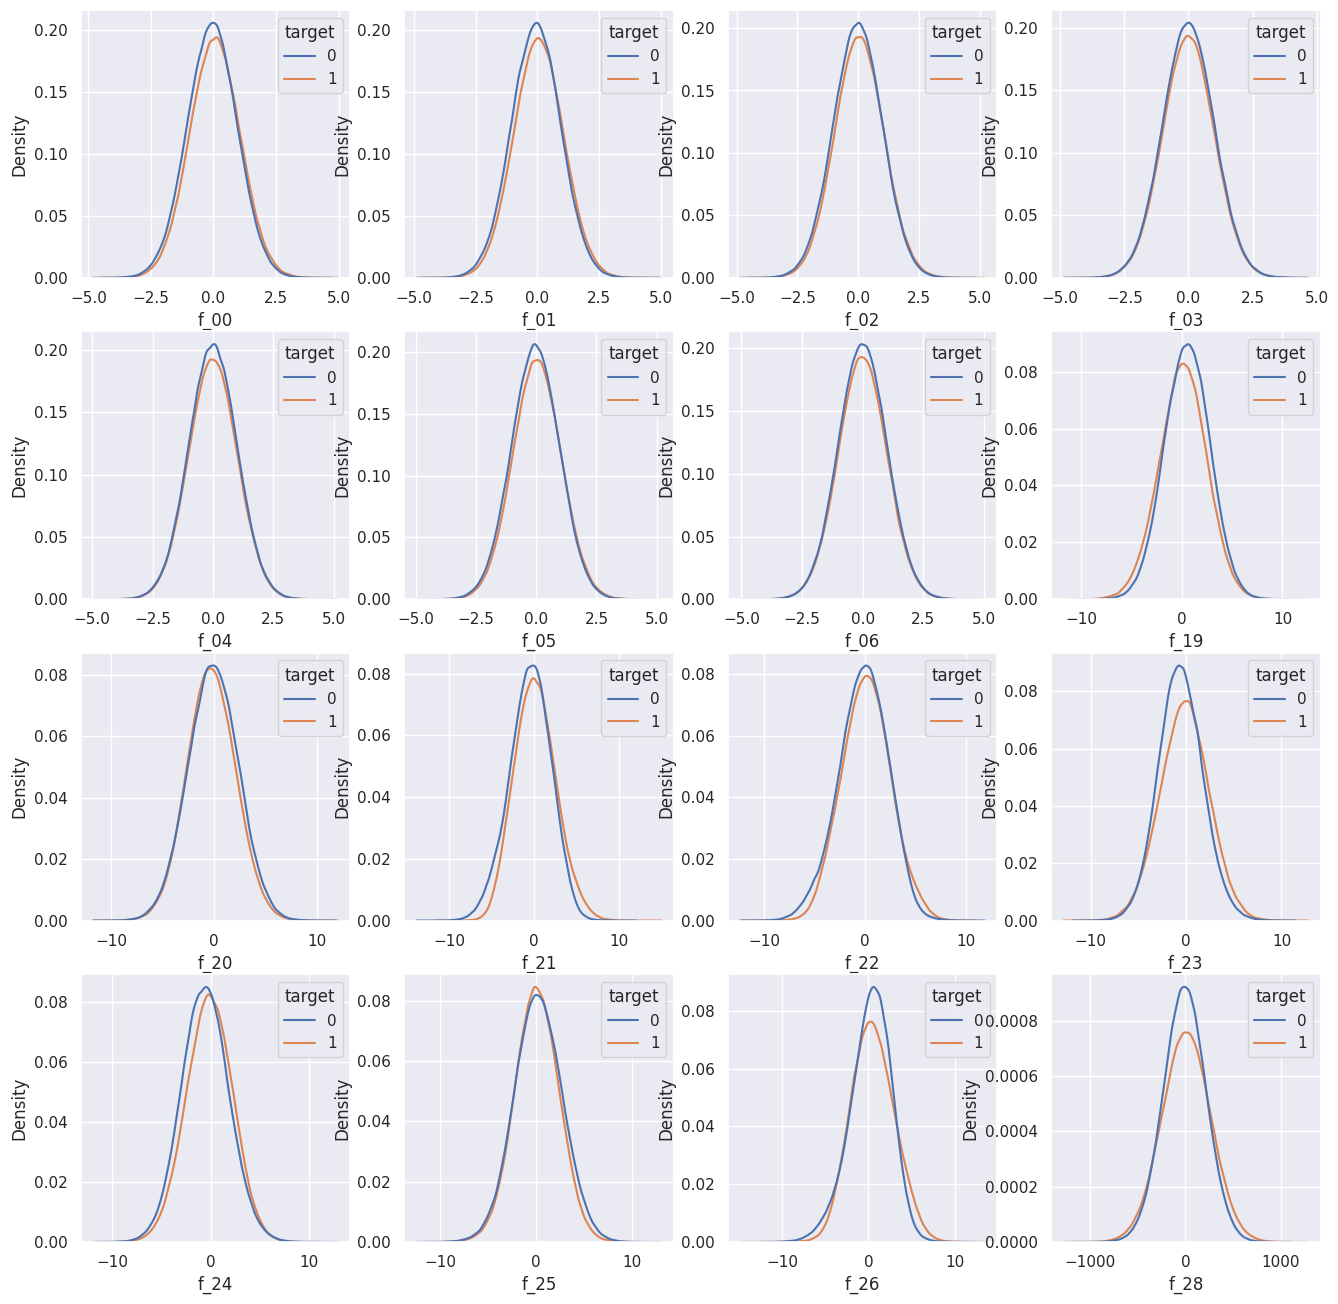

In [14]:
plot_distributions(train, float_features, hue='target', ncols=4, method='hist')

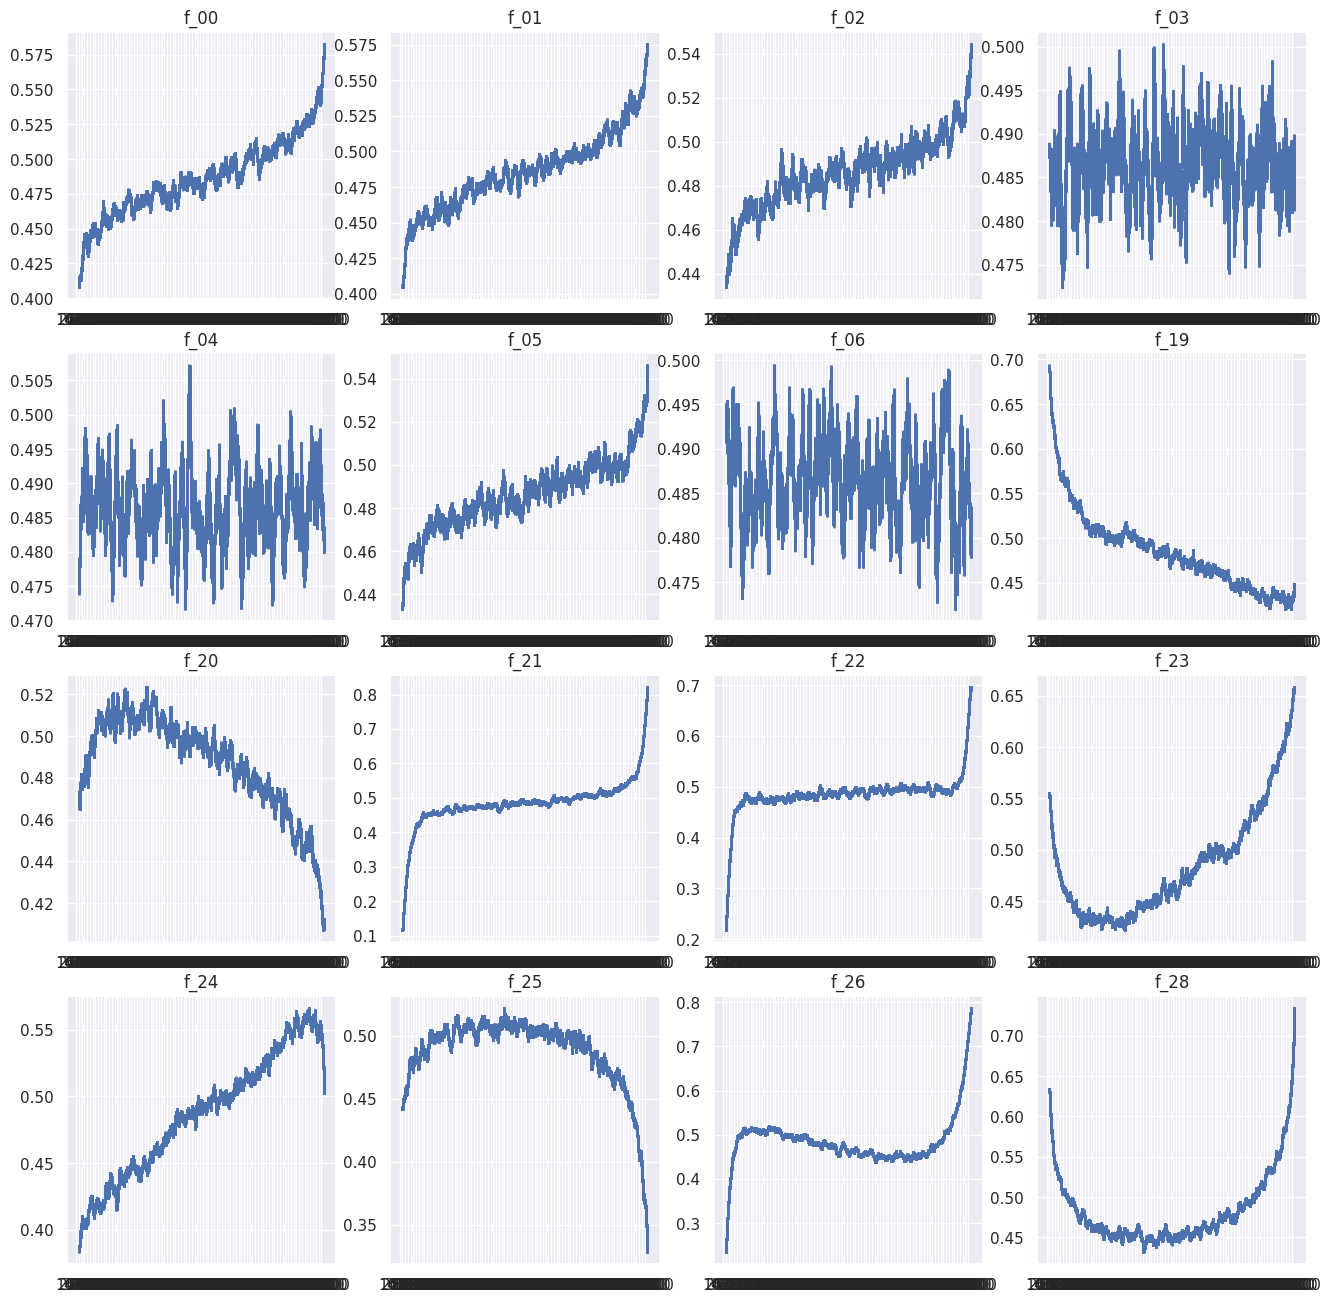

In [15]:
histogram_correlation_plot(train, float_features, 'target', ncols=4, rolling_num=10000)

### Insights 2

- f_00, f_01, f_02, f_05 has same pattern
- f_21, f_22, has same pattern
- f_20, f_25, has same pattern
- f_23, f_28, has same pattern
- f_28 is opposite to the f_25 and f_23 is opposite to the f_20
- f_19 and f_24 are highly correlated with target
- f_03, f_04, f_06 have a low relationship with the target

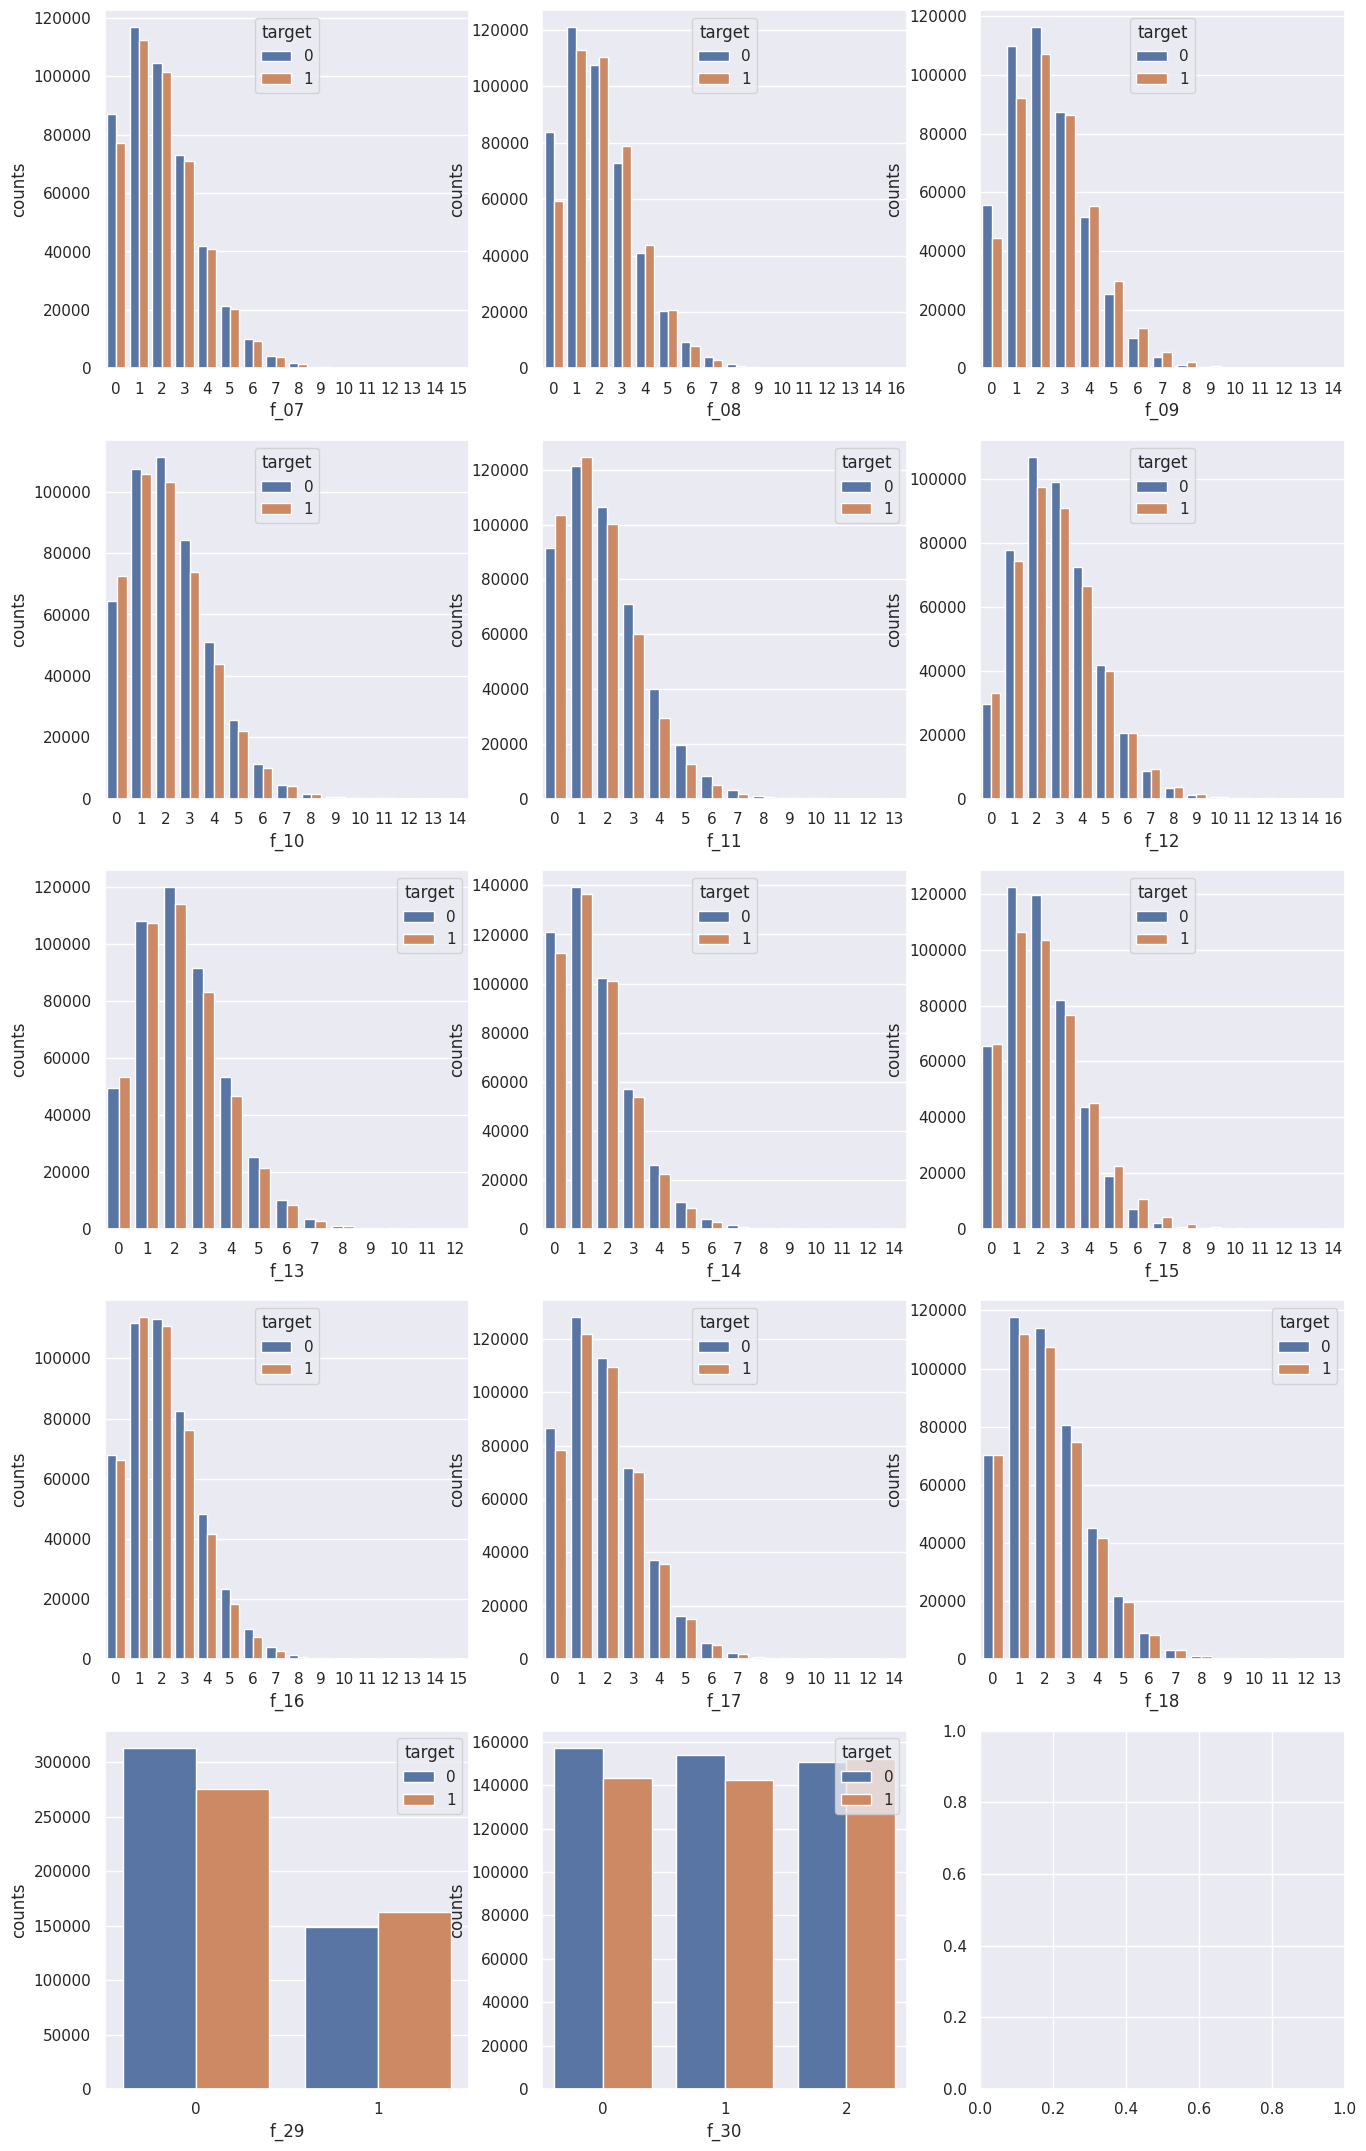

In [16]:
plot_distributions(train, int_features, hue='target', ncols=3, method='bar')

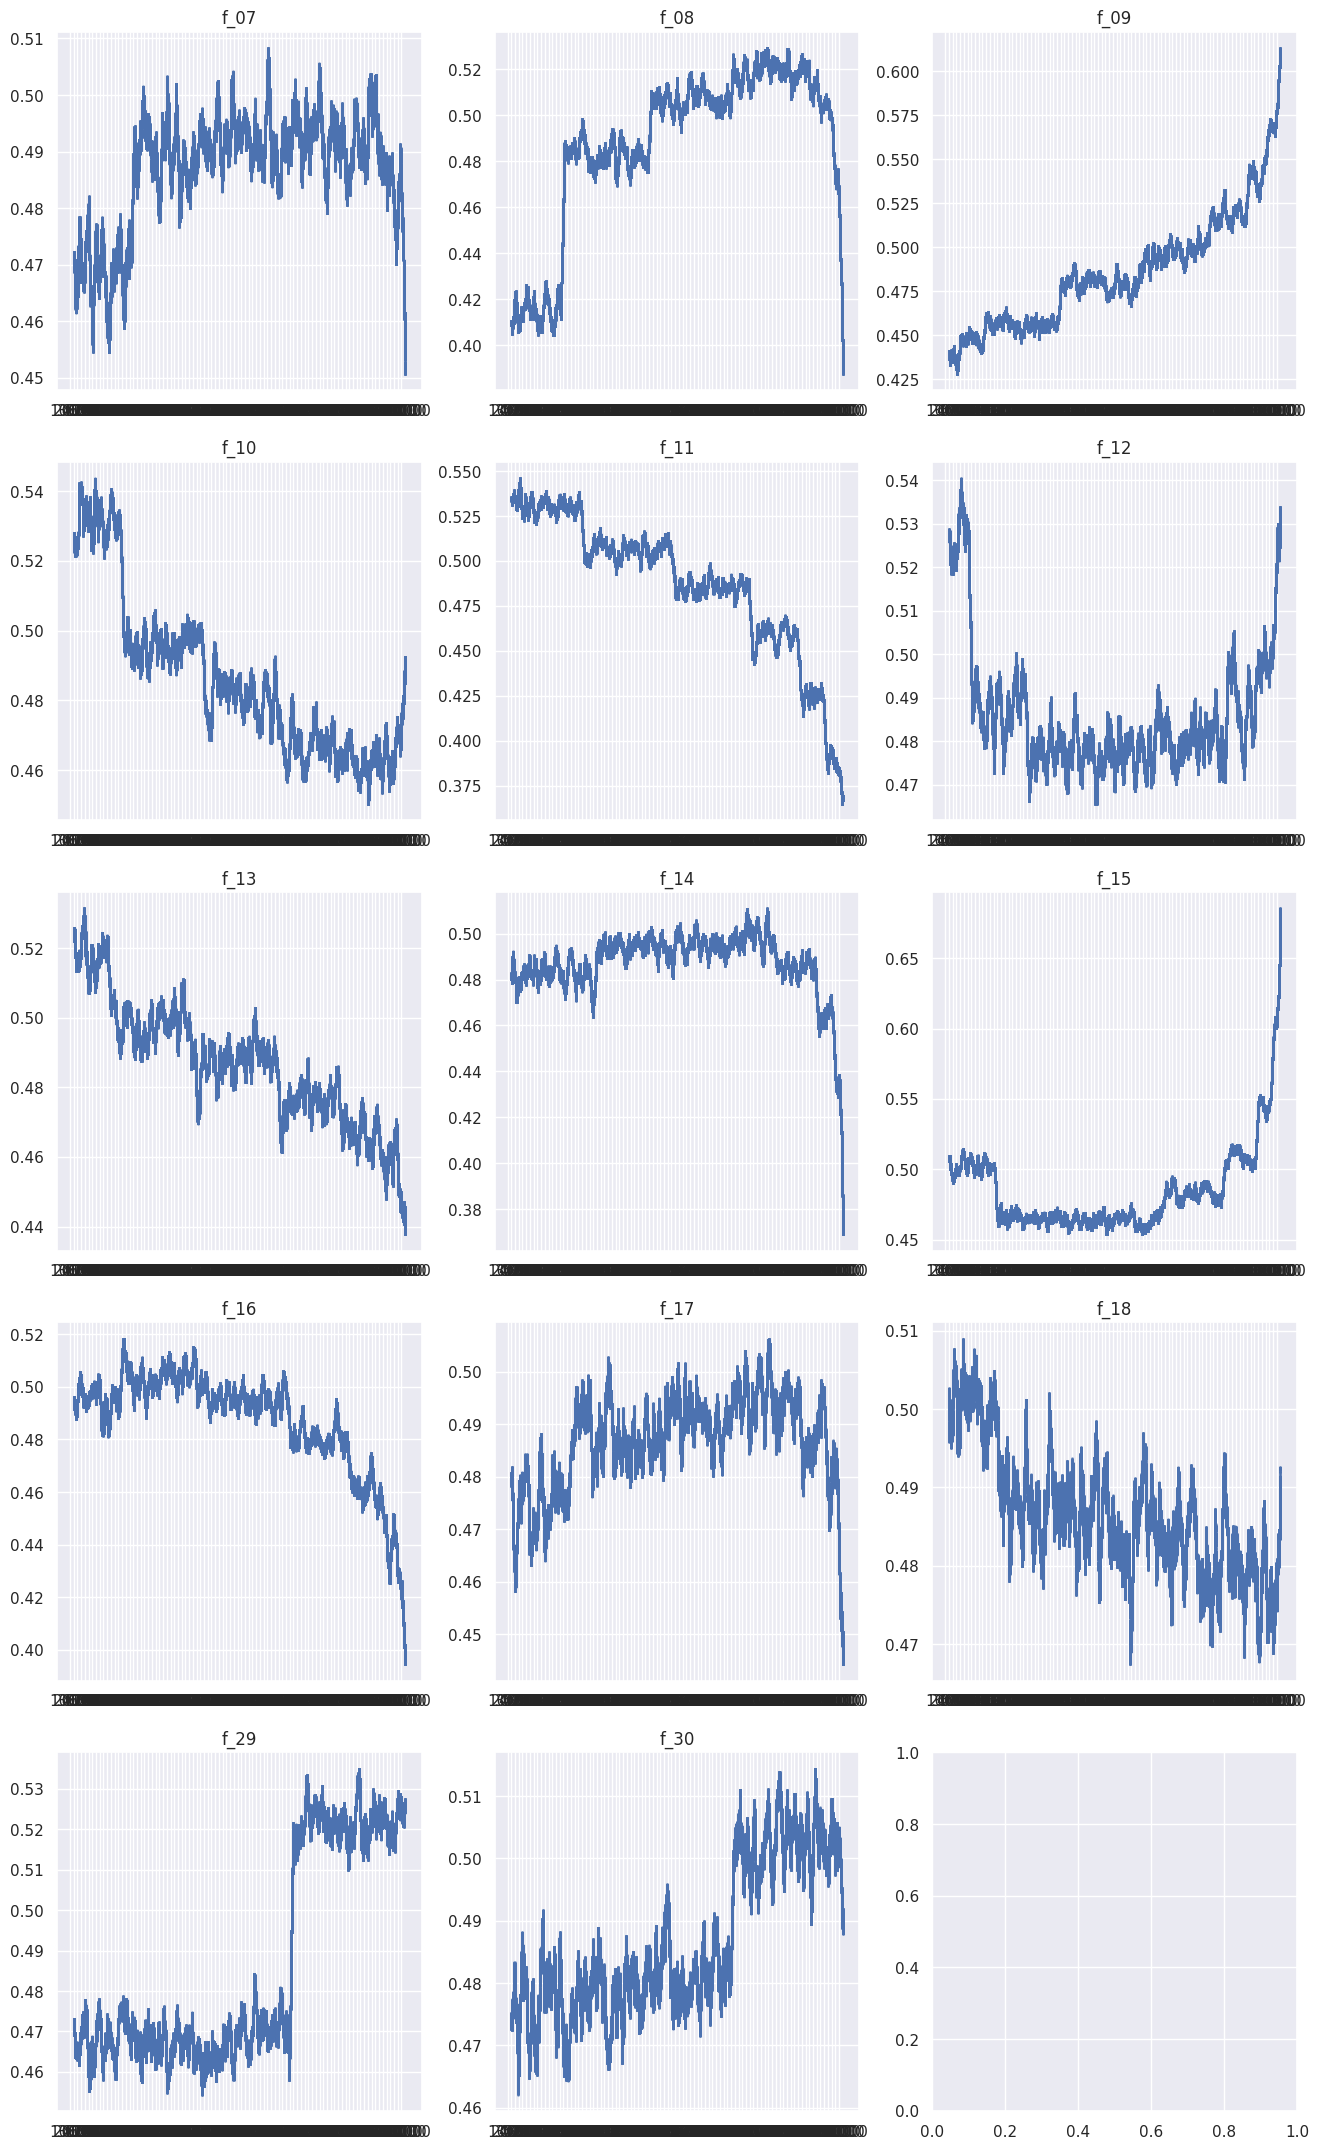

In [17]:
histogram_correlation_plot(train, int_features, 'target', ncols=3, rolling_num=10000)

# Correlations

In [18]:
def display_p_values(df, columns, target, th=0.05, cut=False):
    from scipy.stats import pearsonr
    p_values_list = []
    for c in columns:
        p = round(pearsonr(train.loc[:,target], train.loc[:,c])[1], 4)
        p_values_list.append(p)

    p_values_df = pd.DataFrame(p_values_list, columns=[target], index=columns)
    def p_value_warning_background(cell_value):
        highlight = 'background-color: lightcoral;'
        default = ''
        if cell_value > th:
                return highlight
        return default
    
    if cut:
        p_values_df_high = p_values_df[p_values_df[target] > th]
    else:
        p_values_df_high = p_values_df.copy()
    display(p_values_df_high.style.applymap(p_value_warning_background))

In [19]:
display_p_values(train, float_features, 'target', th=0.05)

In [20]:
display_p_values(train, int_features, 'target', th=0.05)

### Insights 3

- f_03, f_04, f_06 have a low relationship with the target too in this part
- f_12, f_17 have a low relationship with the target but not low as f_03, f_04

# Feature Engineering

In [21]:
def create_features(data):
    object_data_cols = [f"f_27_{i+1}" for i in range(10)]
    object_data = pd.DataFrame(data['f_27'].apply(list).tolist(), columns=object_data_cols)
    for feature in object_data_cols:
        object_data[feature] = object_data[feature].apply(ord) - ord('A')
    
    data = pd.concat([data, object_data], 1)
    data["unique_characters"] = data.f_27.apply(lambda s: len(set(s)))
    return data

In [22]:
train_fe = create_features(train.copy())
test_fe = create_features(test.copy())
train_fe.head()

id      f_00      f_01      f_02      f_03      f_04      f_05      f_06  \
0   0 -1.373246  0.238887 -0.243376  0.567405 -0.647715  0.839326  0.113133   
1   1  1.697021 -1.710322 -2.230332 -0.545661  1.113173 -1.552175  0.447825   
2   2  1.681726  0.616746 -1.027689  0.810492 -0.609086  0.113965 -0.708660   
3   3 -0.118172 -0.587835 -0.804638  2.086822  0.371005 -0.128831 -0.282575   
4   4  1.148481 -0.176567 -0.664871 -1.101343  0.467875  0.500117  0.407515   

   f_07  f_08  ...  f_27_2  f_27_3  f_27_4  f_27_5  f_27_6  f_27_7  f_27_8  \
0     1     5  ...       1       0       1       3       0       3       1   
1     1     3  ...       2       0       2       2       0       3       2   
2     1     0  ...       0       0       4       0       1       2      10   
3     3     2  ...       3       1       1       0       0       2       1   
4     3     3  ...       3       1       2       1       1       2       7   

   f_27_9  f_27_10  unique_characters  
0       0        1                  3  
1       4        1                  5  
2       0        3                  6  
3       2        1                  4  
4       5        4                  6  

[5 rows x 44 columns]

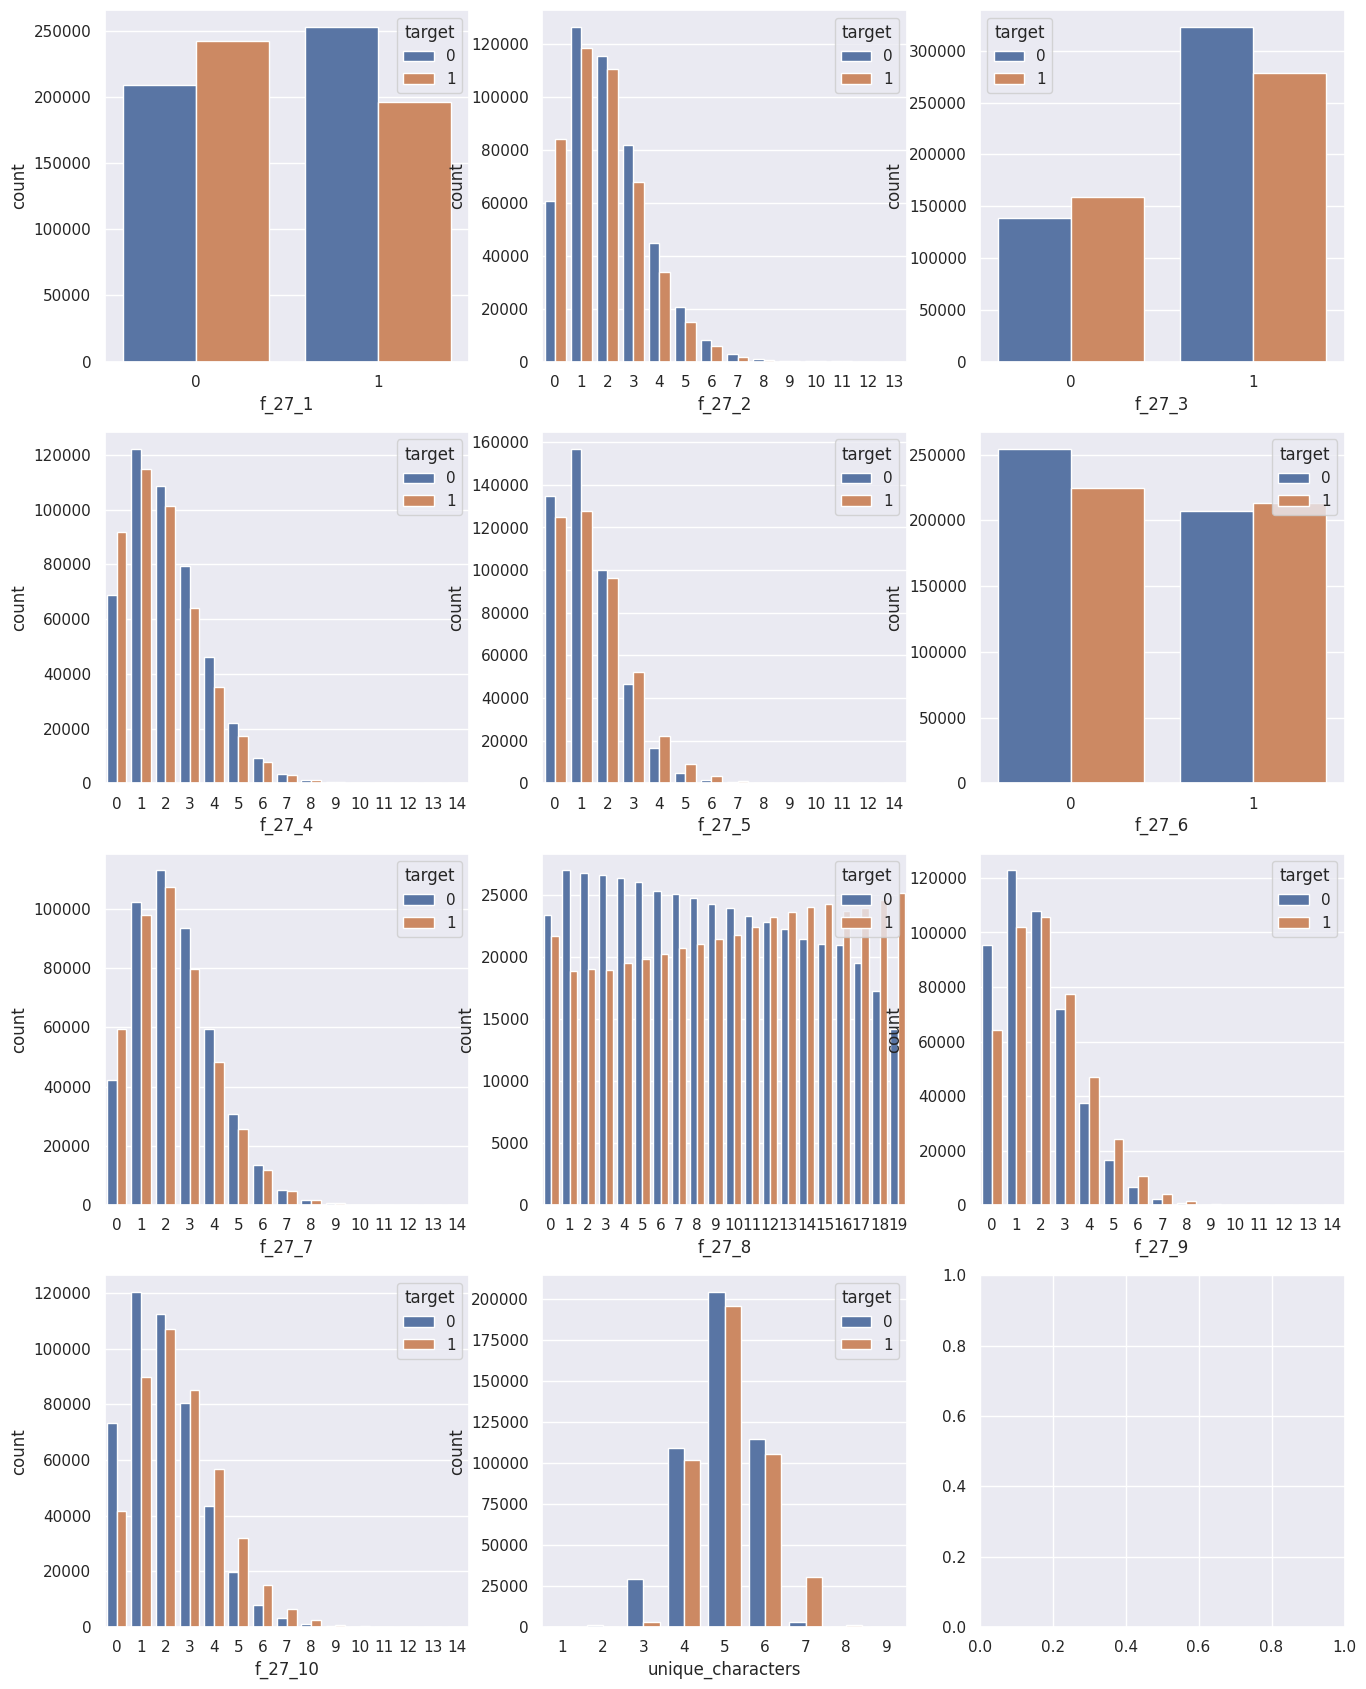

In [23]:
fe_object_features = [f"f_27_{i+1}" for i in range(10)]
fe_object_features.append("unique_characters")
plot_distributions(train_fe, fe_object_features, hue='target', ncols=3, method='count')

# Dimension Reduction Analysis

## PCA Analysis

In [24]:
def plot_pca_target(X, y, features, title, figsize=(16, 8)):
    from sklearn.decomposition import PCA
    from sklearn.preprocessing import StandardScaler
    pca = PCA(n_components=2)
    X_std = StandardScaler().fit_transform(X[features])
    tr_p = pca.fit_transform(X_std)
    
    df_pca = pd.DataFrame()
    df_pca['x'] = tr_p[:, 0]
    df_pca['y'] = tr_p[:, 1]
    df_pca['target'] = y
    
    fig, ax = plt.subplots(figsize=figsize)
    sns.scatterplot(data=df_pca, x='x', y='y', hue='target', alpha=0.5, s=2)
    ax.set_title(title)
    plt.show()
    
def plot_pca_traintest(X_train, X_test, features, title, figsize=(16, 8), max_dis=0.5, find_hard_rows=True, th=0.75):
    from sklearn.decomposition import PCA
    from sklearn.preprocessing import StandardScaler
    from sklearn.neighbors import RadiusNeighborsClassifier
    
    pca = PCA(n_components=2)
    scaler = StandardScaler()
    X_train_std = scaler.fit_transform(X_train[features])
    X_test_std = scaler.transform(X_test[features])
    tr_p = pca.fit_transform(X_train_std)
    te_p = pca.transform(X_test_std)
    
    fig, ax = plt.subplots(figsize=figsize)
            
    #ax.scatter(tr_p[:,0], tr_p[:,1], s=1, c='blue', label='Train') # train: blue
    #ax.scatter(te_p[:,0], te_p[:,1], s=1, c='orange', label='Test') # test: yellow
    sns.scatterplot(x=tr_p[:,0], y=tr_p[:,1], s=2, label='Train', ax=ax)
    sns.scatterplot(x=te_p[:,0], y=te_p[:,1], s=2, label='Test', ax=ax)
    ax.legend()
    ax.set_title(title)
    
    if find_hard_rows:
        neigh = RadiusNeighborsClassifier(radius=max_dis, algorithm='kd_tree', leaf_size=40)
        x_q75, x_q25 = np.percentile(tr_p[:, 0], [th, 100-th])
        y_q75, y_q25 = np.percentile(tr_p[:, 1], [th, 100-th])
        condition_tr = (((tr_p[:, 0]>x_q75)|(tr_p[:, 0]<x_q25))&((tr_p[:, 1]>y_q75)|(tr_p[:, 1]<y_q25)))
        s_tr_p = tr_p[condition_tr, :]
        condition_te = (((te_p[:, 0]>x_q75)|(te_p[:, 0]<x_q25))&((te_p[:, 1]>y_q75)|(te_p[:, 1]<y_q25)))
        indexs = np.arange(0, len(X_test))
        s_te_p = te_p[condition_te, :]
        s_indexs = indexs[condition_te]
        print("th x values:", x_q75, x_q25, "- th y values:", y_q75, y_q25)
        print("train shape:", s_tr_p.shape, "- test shape:", s_te_p.shape)
        
        neigh.fit(s_tr_p, np.ones(s_tr_p.shape[0]))
        neigh_radius = neigh.radius_neighbors(s_te_p)
        # neigh_radius[0][0]: distances, neigh_radius[1][0]: macthes
        hard_rows_list = []
        for i in range(s_te_p.shape[0]):
            if len(neigh_radius[0][i]) == 0:
                hard_rows_list.append(s_indexs[i])
        
        for index in hard_rows_list:
            circle = plt.Circle((te_p[index, 0], te_p[index, 1]), max_dis, color='red', fill=False)
            ax.add_patch(circle)
        print("hard_rows_list len:", len(hard_rows_list))
        
        return hard_rows_list
    

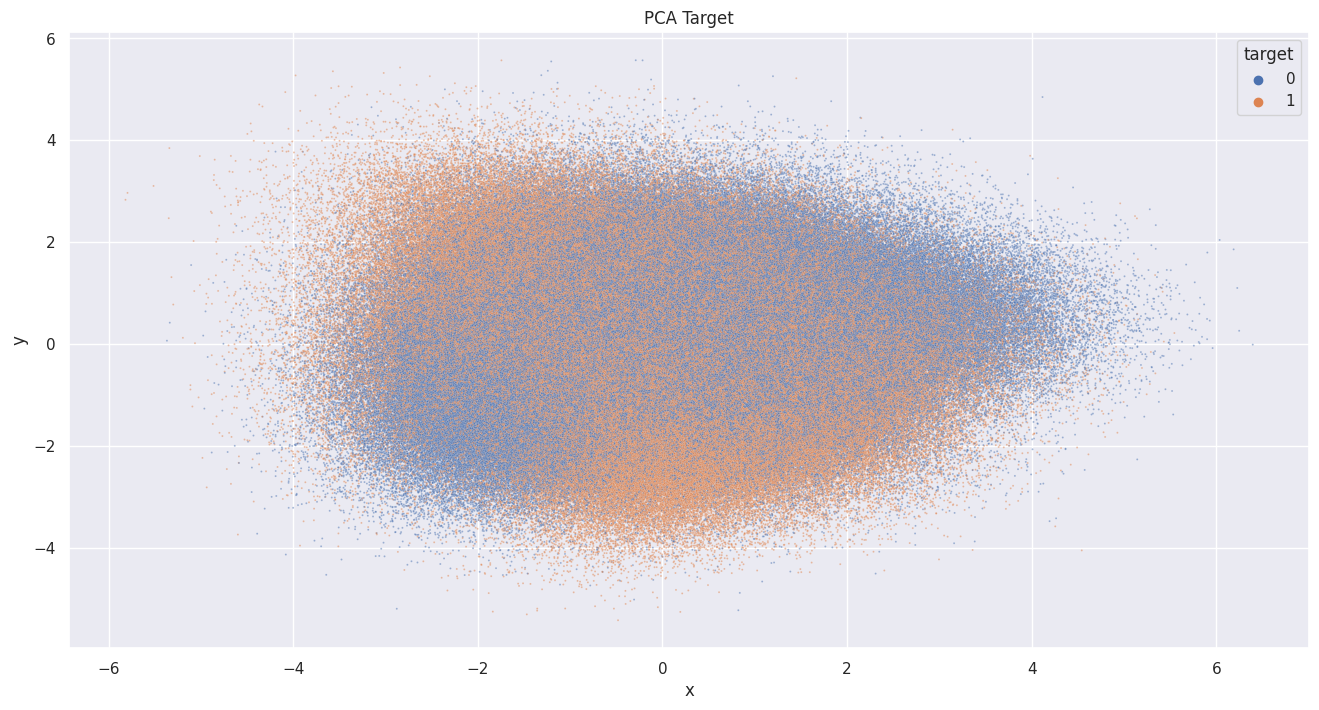

In [25]:
features = [col for col in train_fe.columns if col != "id" and col != "target" and col != "f_27"]
plot_pca_target(train_fe, train_fe[['target']], features, "PCA Target")

In [26]:
import gc

del train
del test
gc.collect()

56683

th x values: 2.4482958415726923 -2.3651082432337978 - th y values: 2.21790358944346 -2.249984920639565
train shape: (8741, 2) - test shape: (6823, 2)
hard_rows_list len: 4


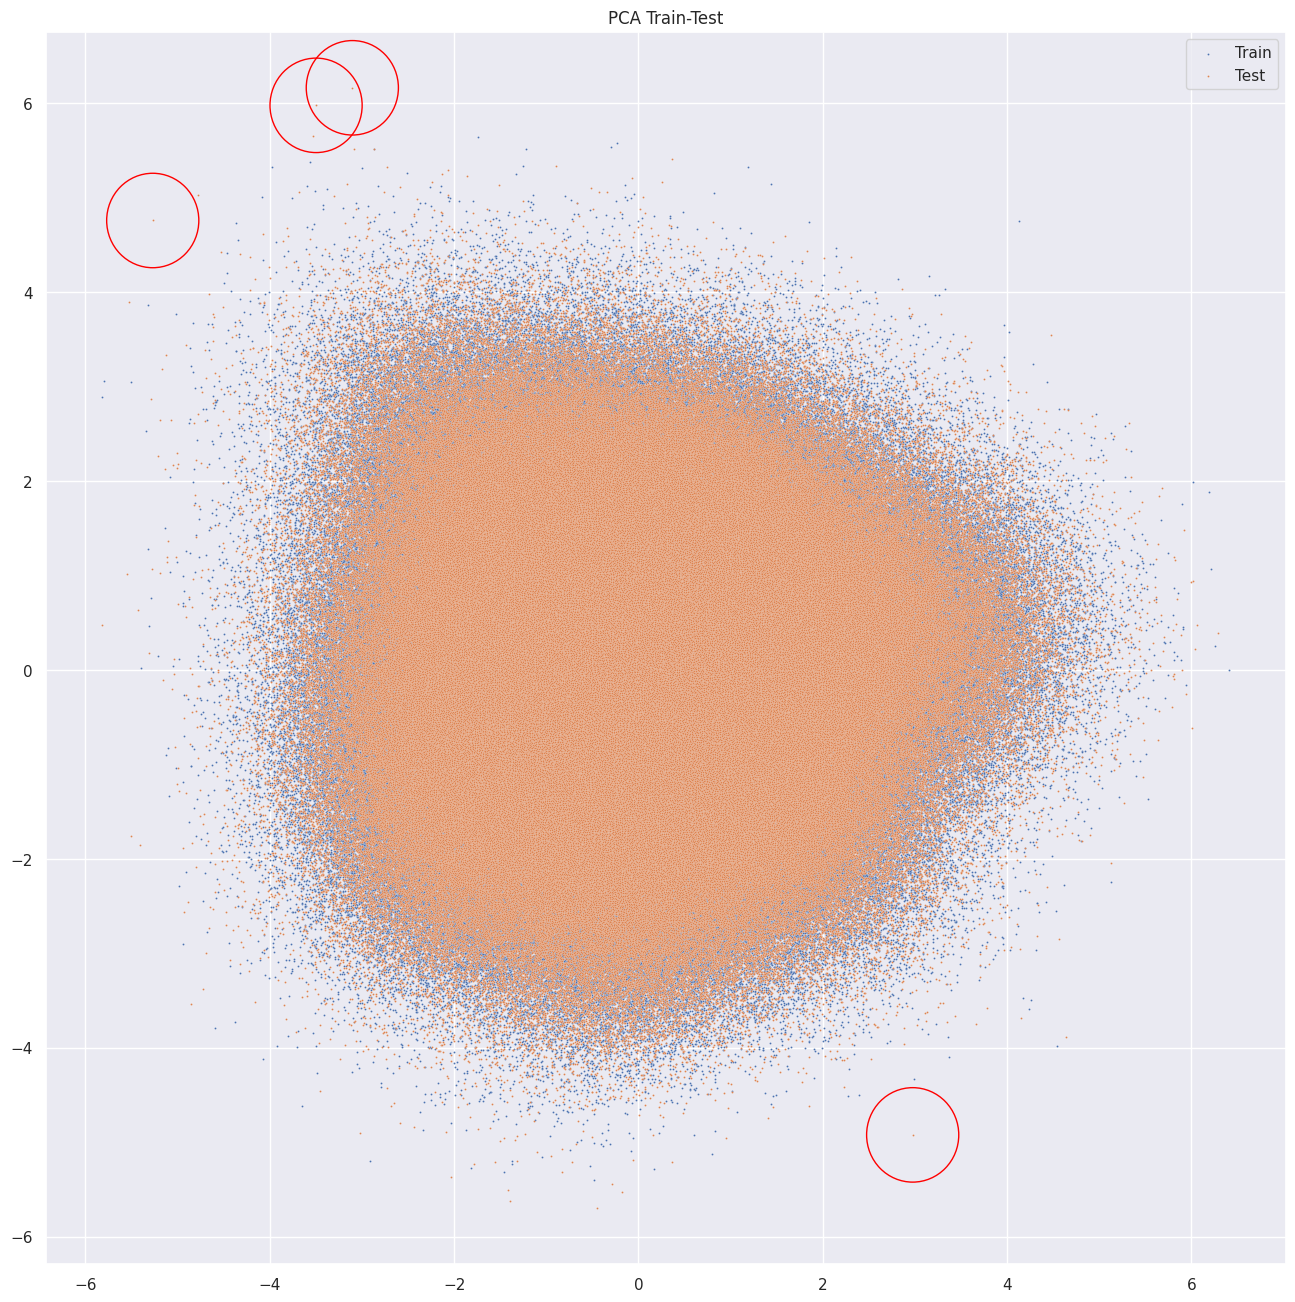

In [27]:
hard_rows_list = plot_pca_traintest(train_fe, test_fe, features, "PCA Train-Test", 
                                    figsize=(16, 16), max_dis=0.5, th=95)

In [28]:
hard_rows_list

[233210, 241822, 501132, 508003]

### Insights 4

- There is no training data near the [233210, 241822, 246986, 501132, 508003] test rows.

## UMAP

In [29]:
def plot_umap(embedding, df, col, ax=None):
    colors = pd.factorize(df.loc[:, col])
    colors_dict = {}
    for index, label in enumerate(df[col].unique()):
        colors_dict[index] = label
    color_list = sns.color_palette(None, len(df[col].unique()))
    
    if ax == None:
        fig, ax = plt.subplots(figsize=(12,12))
        for color_key in colors_dict.keys():
            indexs = colors[0] == color_key
            temp_embedding = embedding[indexs, :]
            ax.scatter(temp_embedding[:, 0], temp_embedding[:, 1], 
                        c=color_list[color_key], 
                        edgecolor='none', 
                        alpha=0.80,
                        label=colors_dict[color_key],
                        s=10)
        ax.legend(bbox_to_anchor=(1, 1), fontsize="x-large", markerscale=2.)
        ax.set_title('UMAP - ' + col, fontsize=18);
    else:
        for color_key in colors_dict.keys():
            indexs = colors[0] == color_key
            temp_embedding = embedding[indexs, :]
            ax.scatter(temp_embedding[:, 0], temp_embedding[:, 1], 
                        c=color_list[color_key], 
                        edgecolor='none', 
                        alpha=0.80,
                        label=colors_dict[color_key],
                        s=10)
        ax.legend(bbox_to_anchor=(1, 1), fontsize="x-large", markerscale=2.)
        ax.set_title('UMAP - ' + col, fontsize=18);

# Baseline

In [31]:
from catboost import CatBoostClassifier

X_train = train_fe.drop(['id', 'target', 'f_27'], 1)
y_train = train_fe[['target']]
model = CatBoostClassifier(cat_features=fe_object_features)
model.fit(X_train, y_train, verbose=0)

In [ ]:
X_test = test_fe.drop(['id', 'f_27'], 1)
sub['target'] = model.predict_proba(X_test)[:, 1]
sub.to_csv('submission.csv', index=False)

# Feature Importance

In [ ]:
def plot_feature_importance(importance,names,model_type, figsize=(10, 8)):
    
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    
    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    
    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    
    #Define size of bar plot
    plt.figure(figsize=figsize)
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + ' FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

In [ ]:
plot_feature_importance(model.feature_importances_, X_train.columns, 'CatBoost', figsize=(8, 16))

# Insights

### Insights 1

- f_07, f_09, f_10, f_11, f_13 has one more different value in test set
- f_08, f_14, f_15, f_16 has more value in train set than test set
- f_12 has 16 in train but has 15 in test. f_17 has 14 in train but has 13 in test. Just one value.
- f_29, f_30 can be object types

### Insights 2

- f_00, f_01, f_02, f_05 has same pattern
- f_21, f_22, has same pattern
- f_20, f_25, has same pattern
- f_23, f_28, has same pattern
- f_28 is opposite to the f_25 and f_23 is opposite to the f_20
- f_19 and f_24 are highly correlated with target
- f_03, f_04, f_06 have a low relationship with the target

### Insights 3

- f_03, f_04, f_06 have a low relationship with the target too in this part
- f_12, f_17 have a low relationship with the target but not low as f_03, f_04

### Insights 4

- There is no training data near the [233210, 241822, 246986, 501132, 508003] test rows.